In [1]:
# 비지도학습
# 정답 데이터가 x 
# feature set을 가져다가 예측을 해주는

### 군집화
- 유사성이 높은 데이터들을 동일한 그룹으로 분류하고 서로 다른 군집들이 상이성을 가지도록 그룹화
    - 고객, 마켓, 브랜드, 사회 경제 활동 세분화(Segmentation)
    - Image 검출, 세분화, 트렌딩
    - 이상 검출(Abnomaly detection)
    
    
- 어떻게 유사성 계산?
    - 무작위 Centeroid를 잡는다
    - 거리 계산
    - 가장 거리가 가까운 집합으로 분류

In [2]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# df.loc[0] = [7,1]
# df.loc[1] = [2,1]
# df.loc[2] = [4,2]
# df.loc[3] = [9,4]
# df.loc[4] = [10,5]
# df.loc[5] = [10,6]
# df.loc[6] = [11,5]
# df.loc[7] = [11,6]
# df.loc[8] = [15,3]
# df.loc[9] = [15,2]
# df.loc[10] = [16,6]
# df.loc[11] = [16,1]


In [4]:
df = pd.DataFrame(columns=('x','y'))
df.loc[0] = [7,1]
df.loc[1] = [2,1]
df.loc[2] = [4,2]
df.loc[3] = [9,4]
df.loc[4] = [8,6]
df.loc[5] = [3,3]
df.loc[6] = [6,5]
df.loc[7] = [5,9]
df.loc[8] = [0,7]
df.loc[9] = [10,3]
df.loc[10] = [11,4]
df.loc[11] = [12,7]

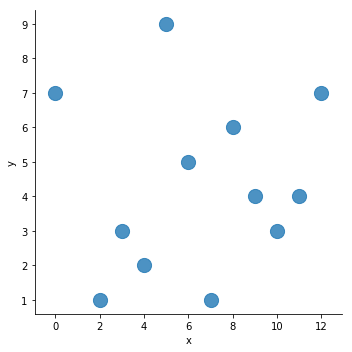

In [105]:
sns.lmplot('x' , 'y', data=df, fit_reg=False, scatter_kws={'s' : 200})


In [6]:
data_points = df.values
data_points

array([[7, 1],
       [2, 1],
       [4, 2],
       [9, 4],
       [8, 6],
       [3, 3],
       [6, 5],
       [5, 9],
       [0, 7],
       [10, 3],
       [11, 4],
       [12, 7]], dtype=object)

In [7]:
# n_clusters : 몇개로 그룹화를 해줄 것 이냐
kmeans = KMeans(n_clusters=3).fit(data_points)
kmeans.labels_

array([2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 0])

In [8]:
df['clu_id'] = kmeans.labels_
df

,x,y,clu_id
0,7,1,2
1,2,1,2
2,4,2,2
3,9,4,0
4,8,6,0
5,3,3,2
6,6,5,2
7,5,9,1
8,0,7,1
9,10,3,0


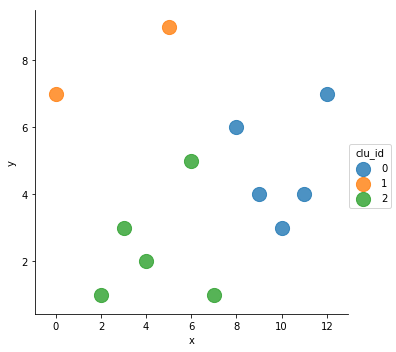

In [9]:
# visualization data point
sns.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={'s' : 200}, hue='clu_id')

In [10]:
# 분류용 가상 데이터 생성
# make_blobs() : 등방성 가우시안 정규분포
# n_samples : 표본수 (몇개의 표본을 만들 것이더냐)
# n_features : 독립변수의 수
# center : 클러스터의 수 

In [11]:
from sklearn.datasets import make_blobs

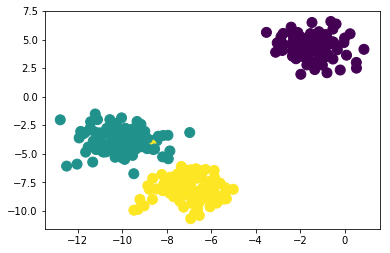

In [12]:
X, y = make_blobs(n_samples = 300, n_features=2, centers=3, random_state =1)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100)
plt.show()

In [13]:
feature, label = make_blobs(random_state=1)

In [14]:
label

array([0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0])

In [17]:
clu_mean = KMeans(n_clusters=3)
clu_mean.fit(feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
clu_mean.labels_

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0])

In [19]:
clu_mean.predict(feature)

array([0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 2,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0])

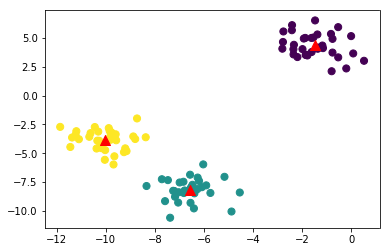

In [33]:
plt.scatter(feature[:, 0], feature[:, 1], 
            c=clu_mean.labels_,
            marker='o', 
            s = 50)
plt.scatter(clu_mean.cluster_centers_[:, 0], clu_mean.cluster_centers_[:, 1],
            c= 'r',
            marker = '^',
            s = 100)
plt.show()

In [27]:
clu_mean.cluster_centers_

array([[ -1.4710815 ,   4.33721882],
       [ -6.58196786,  -8.17239339],
       [-10.04935243,  -3.85954095]])

### K-Means Clustering

In [34]:
# iris clustering

In [35]:
from sklearn.datasets import load_iris

In [39]:
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [40]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


KMeans 객체 생성하고 군집화 수행

In [60]:
iris_means = KMeans(n_clusters=3, random_state=0,
                    init = 'k-means++', max_iter = 300)
iris_means.fit(iris_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [61]:
print(iris_means.labels_)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [62]:
iris_means.predict(iris_df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [109]:
# 포인트 별 할당된 중심점

iris_df['clu_id'] = iris_means.labels_
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pca_x,pca_y,clu_id
0,5.1,3.5,1.4,0.2,0,-2.684207,0.326607,1
1,4.9,3.0,1.4,0.2,0,-2.715391,-0.169557,1
2,4.7,3.2,1.3,0.2,0,-2.889820,-0.137346,1
3,4.6,3.1,1.5,0.2,0,-2.746437,-0.311124,1
4,5.0,3.6,1.4,0.2,0,-2.728593,0.333925,1


In [110]:
# 그룹(target, clu_id)을 통한 sepal_length의 빈도를 확인

iris_df.groupby(['target', 'clu_id'])['petal length (cm)'].count()

target  clu_id
0       1         50
1       0         48
        2          2
2       0         14
        2         36
Name: petal length (cm), dtype: int64

In [111]:
# 2차원 평면에 데이터 포인트 별로 군집화된 결과를 시각화
# 차원 축소
# 주성분 분석

from sklearn.decomposition import PCA

iris_pca = PCA(n_components=2)
iris_pca_transform = iris_pca.fit_transform(iris.data)
# iris_pca_transform
iris_df['pca_x'] = iris_pca_transform[:, 0]
iris_df['pca_y'] = iris_pca_transform[:, 1]

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pca_x,pca_y,clu_id
0,5.1,3.5,1.4,0.2,0,-2.684207,0.326607,1
1,4.9,3.0,1.4,0.2,0,-2.715391,-0.169557,1
2,4.7,3.2,1.3,0.2,0,-2.889820,-0.137346,1
3,4.6,3.1,1.5,0.2,0,-2.746437,-0.311124,1
4,5.0,3.6,1.4,0.2,0,-2.728593,0.333925,1


In [151]:
clu_means = KMeans(n_clusters=3)

clu_means.fit(iris_df[['pca_x', 'pca_y']])
clu_means.predict(iris_df[['pca_x', 'pca_y']])

clu_means.cluster_centers_

array([[-2.64084076,  0.19051995],
       [ 0.66443351, -0.33029221],
       [ 2.34645113,  0.27235455]])

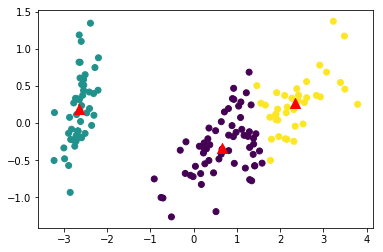

In [152]:
plt.scatter(x=iris_df['pca_x'], y = iris_df['pca_y'], c =iris_df['clu_id'])
plt.scatter(clu_means.cluster_centers_[:, 0], clu_means.cluster_centers_[:, 1], 
            s = 100, marker = '^', c = 'r')

plt.show()

In [153]:
# case 2 표준화 통한 차원축소 및 시각화

scaler = StandardScaler()
sc_iris = scaler.fit_transform(iris_df.iloc[:, :4])
sc_iris_df = pd.DataFrame(sc_iris)
sc_iris_df

pcaa = PCA(n_components=2)

pcaa_iris = pcaa.fit_transform(sc_iris_df)
iris_df['sc_pca_x'] = pcaa_iris[:, 0]
iris_df['sc_pca_y'] = pcaa_iris[:, 1]

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pca_x,pca_y,clu_id,sc_pca_x,sc_pca_y
0,5.1,3.5,1.4,0.2,0,-2.684207,0.326607,1,-2.264542,0.505704
1,4.9,3.0,1.4,0.2,0,-2.715391,-0.169557,1,-2.086426,-0.655405
2,4.7,3.2,1.3,0.2,0,-2.889820,-0.137346,1,-2.367950,-0.318477
3,4.6,3.1,1.5,0.2,0,-2.746437,-0.311124,1,-2.304197,-0.575368
4,5.0,3.6,1.4,0.2,0,-2.728593,0.333925,1,-2.388777,0.674767


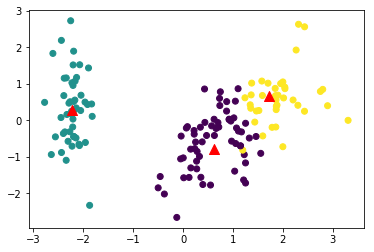

In [150]:
plt.scatter(x = iris_df['sc_pca_x'], y = iris_df['sc_pca_y'], c=iris_df['clu_id'])
plt.scatter(c_means.cluster_centers_[:, 0], c_means.cluster_centers_[:, 1], 
            marker='^', s = 100, c = 'r')

plt.show()

In [147]:
c_means = KMeans(n_clusters=3)

c_means.fit(iris_df[['sc_pca_x', 'sc_pca_y']])
c_means.predict(iris_df[['sc_pca_x', 'sc_pca_y']])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [148]:
c_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [149]:
c_means.cluster_centers_

array([[ 1.71890108,  0.65217008],
       [-2.22019328,  0.29222482],
       [ 0.61198392, -0.79925263]])

### 차원축소 (PCA)

PCA(차원축소): Principal component analysis 
- 데이터의 피처를 압축(테이블 매트릭스의 차원을 낮추는 작업)
- 예) 온도, 습도, 강수량, 미세먼지, 풍속, 태풍여부 ... 교통량, 유동인구
- 습도와 강수량은 양의 상관관계로 이 둘은 밀접한 연관성이 있다고 볼 수 있다.
- 연관성이 있는 피처들은 하나로 합쳐주는 작업이 주성분 분석

In [77]:
pca_iris_df = iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
pca_iris_df['target'] = iris.target
pca_iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


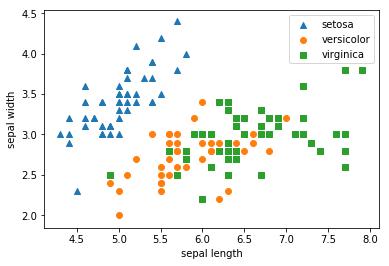

In [80]:
markers = ['^', 'o', 's']
for i, marker in enumerate(markers):
#     print(i, marker)
    x_data_point = pca_iris_df[pca_iris_df['target'] == i]['sepal length (cm)']
    y_data_point = pca_iris_df[pca_iris_df['target'] == i]['sepal width (cm)']
#     print(x_data_point, y_data_point)
    plt.scatter(x_data_point, y_data_point, 
                marker = marker, 
                label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [102]:
# 컬럼에 대한 데이터 표준화
from sklearn.preprocessing import StandardScaler

# 타겟을 제외한 피쳐만 추출하여 표준화 작업을 진행
# 주성분 분석을 하기 전에 데이터 표준화해주자
# StandardScaler.fit_trainsform()

scaler = StandardScaler()
scaler.fit(iris_df.iloc[:, :4])
iris_scaler = scaler.transform(iris_df.iloc[:, :4])

pca_iris_scaler_df = pd.DataFrame(iris_scaler)
pca_iris_scaler_df.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [100]:
# 주성분 분석
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
# -> 피처를 2개로 줄이겠다는 차원 축소

iris_pca = pca.fit(iris_scaler).transform(iris_scaler)
# iris_pca

iris_pca_df = pd.DataFrame(iris_pca, columns = ['pca01', 'pca02'])
iris_pca_df['target'] = iris.target
iris_pca_df.describe()

,pca01,pca02,target
count,1.500000e+02,1.500000e+02,150.000000
mean,5.802766e-16,8.275787e-17,1.000000
std,1.711828e+00,9.630180e-01,0.819232
min,-2.774170e+00,-2.658063e+00,0.000000
25%,-2.121636e+00,-5.946612e-01,0.000000
50%,4.145452e-01,8.434525e-03,1.000000
75%,1.342582e+00,5.878221e-01,2.000000
max,3.309141e+00,2.722371e+00,2.000000


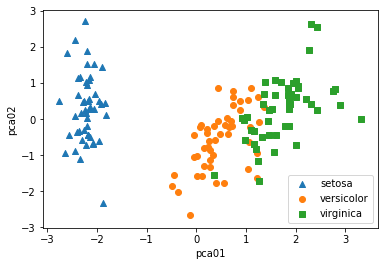

In [103]:
markers = ['^', 'o', 's']
for i, marker in enumerate(markers):
#     print(i, marker)
    x_data_point = iris_pca_df[iris_pca_df['target'] == i]['pca01']
    y_data_point = iris_pca_df[iris_pca_df['target'] == i]['pca02']
#     print(x_data_point, y_data_point)
    plt.scatter(x_data_point, y_data_point, 
                marker = marker, 
                label=iris.target_names[i])
plt.legend()
plt.xlabel('pca01')
plt.ylabel('pca02')
plt.show()